In [6]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = json.load(open("logs/test.json"))
data.keys()

dict_keys(['rewards', 'regret', 'oracle_weights'])

In [9]:
worlds = list(data["regret"].keys())
world_names = ["Cone", "Puddle", "Three Lane", "Four Lane"]
x = np.arange(len(worlds))
worlds

['cone_avoid', 'puddle_avoid', 'cone_car_avoid', 'cone_car_avoid_four']

In [5]:
data["regret"]["cone_avoid"]

{'naive': [25.37976086139679,
  43.2797971367836,
  20.01236781477928,
  16.4855894446373],
 'masked_dphi': [26.489146202802658,
  44.73121866583824,
  25.9178626537323,
  32.966518849134445],
 'masked_dphi_sign': [33.00012603402138,
  55.47914534807205,
  25.9178626537323,
  32.966518849134445],
 'llm': [38.01623344421387,
  56.30898490548134,
  30.584628731012344,
  28.615095913410187],
 'adapt_llm': [32.99956813454628,
  55.4790461063385,
  25.917776376008987,
  32.96643257141113],
 'adapt_gated_llm': [1.1934667825698853,
  20.715553611516953,
  -4.72091481089592,
  -9.003279954195023]}

In [14]:
learners = ["naive", "masked_dphi", "llm", "adapt_llm", "adapt_gated_llm"]
learner_names = ["Baseline", "Masked", "Continuous", "Continuous + Language", "Masked Continuous"]
means = [[np.mean(data["regret"][w][l]) for w in worlds] for l in learners]
stderrs = [[np.std(data["regret"][w][l]) / np.sqrt(len(data["regret"][w][l])) for w in worlds] for l in learners]

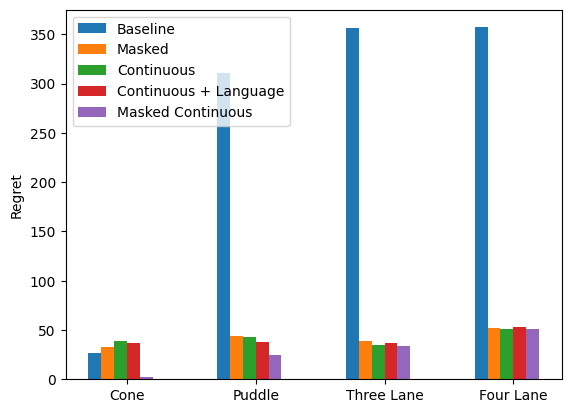

In [17]:
fig, ax = plt.subplots()
for i in range(len(learners)):
    ax.bar(x + i * 0.1 - 0.25, means[i], width=0.1, label=learner_names[i])
ax.set_xticks(x)
ax.set_xticklabels(world_names)
ax.set_ylabel("Regret")
ax.legend()

: 